In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
import matplotlib.pyplot as plt

Подготовка данных

In [ ]:
l = eval(open('task1.txt', 'r').read())
l = list(map(float, l))

In [ ]:
data = np.array(l)

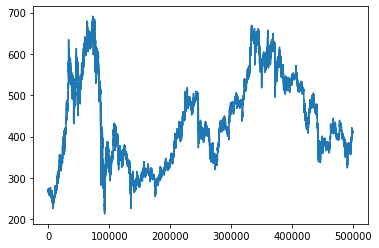

In [ ]:
plt.plot(data)

In [ ]:
def plot_seq(seq, plot_nums):
    plt.figure(figsize=(20,20))
    width = int(np.sqrt(plot_nums))
    for i in range(plot_nums):
        plt.subplot(width,width,i+1)
        start = len(seq) // plot_nums * i
        finish = start + len(seq) // plot_nums
        xdata = np.arange(start, finish)
        ydata = seq[start:finish]
        plt.plot(xdata, ydata)
    plt.show()

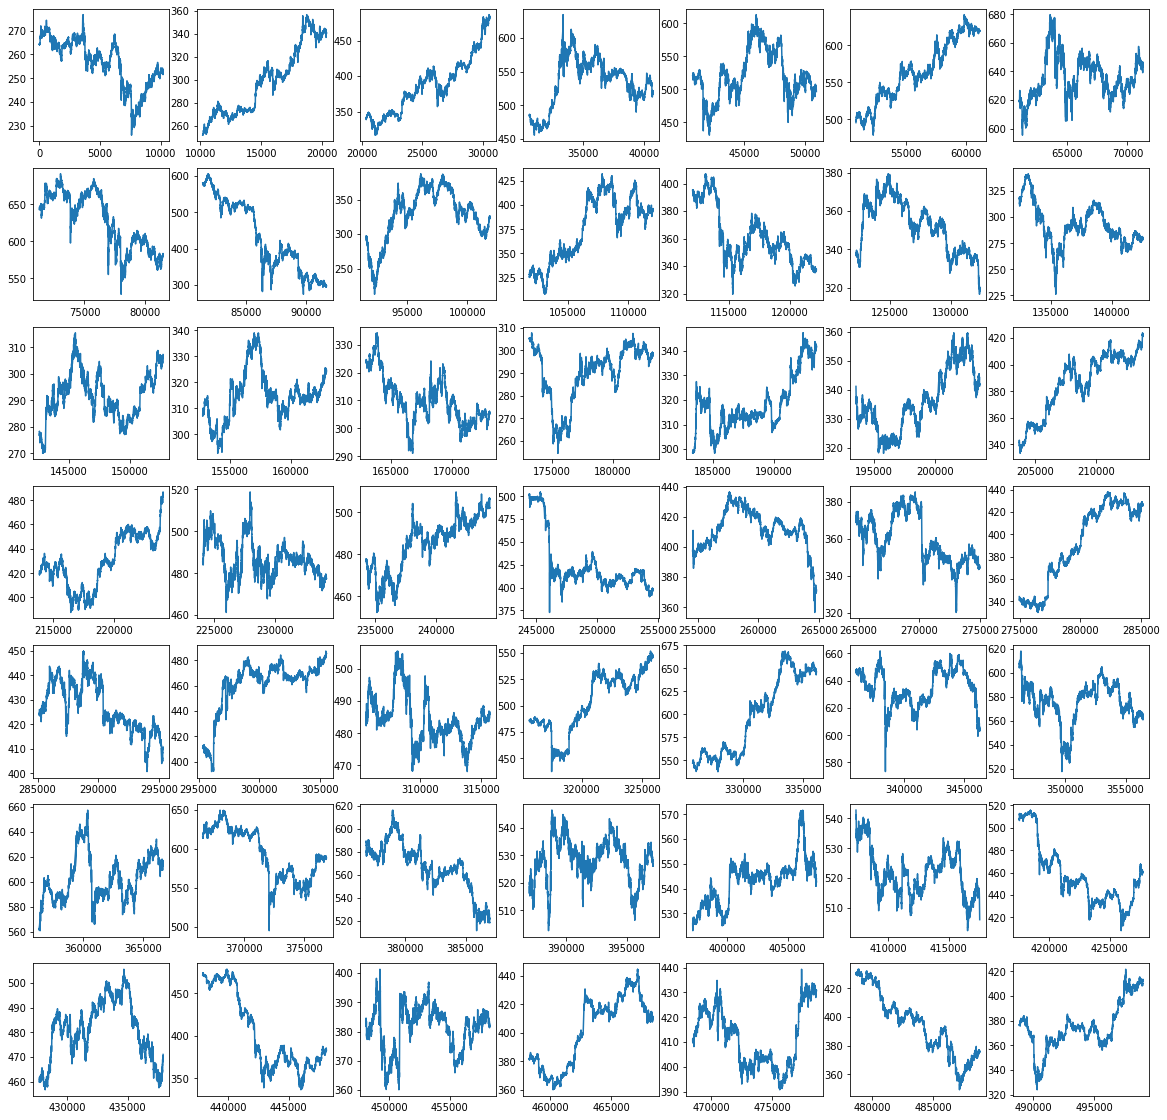

In [ ]:
plot_seq(data, 49)

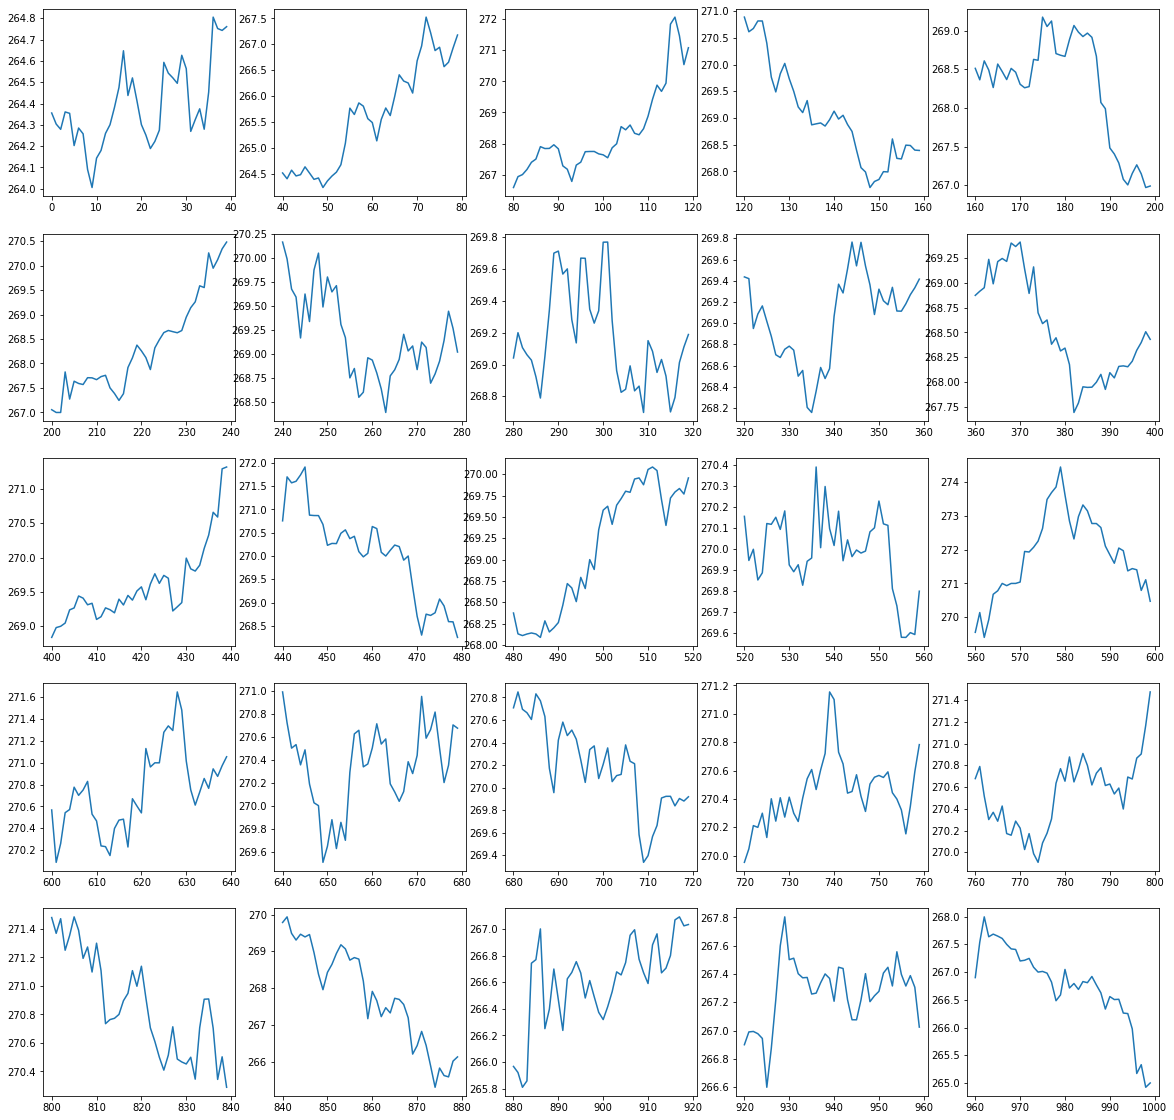

In [ ]:
plot_seq(data[:1000], 25)

Подготовка данных

In [ ]:
init_data = data.copy()

In [ ]:
data = init_data[:-2000].copy().reshape(-1, 1)

In [ ]:
def split_sequence(seq, partition_len):
    
    ast=np.lib.index_tricks.as_strided 
    X = ast(seq,shape=(len(seq) - partition_len, partition_len), strides=(8,8)) # sizeof(float64) == 8
    y = seq[partition_len:partition_len + len(X)]
    return X.copy(), y

In [ ]:
def train_model(model, scaler=StandardScaler, epochs=5):   
    X, y = split_sequence(data, PART_LEN)
    history = model.fit(X, y, epochs=epochs, validation_split=0.25)
    return history.history

In [ ]:
def draw(history):
    plt.yscale('log')
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()   

In [ ]:
PART_LEN=50

In [ ]:
EPOCHS = 10

### 1) LSTM 2 layers

In [ ]:
model_1 = models.Sequential() 
model_1.add(layers.LSTM(10, input_shape=(PART_LEN, 1), return_sequences=True)) 
model_1.add(layers.LSTM(10)) 
model_1.add(layers.Dense(1))
model_1.compile(loss='mean_squared_error', optimizer='adam')

2022-03-08 18:39:57.445461: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-03-08 18:39:57.445497: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: alex-TM1703
2022-03-08 18:39:57.445507: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: alex-TM1703
2022-03-08 18:39:57.445647: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 510.47.3
2022-03-08 18:39:57.445674: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 510.47.3
2022-03-08 18:39:57.445681: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 510.47.3
2022-03-08 18:39:57.446297: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-criti

In [ ]:
history = train_model(model_1, epochs=EPOCHS)

Epoch 1/10
11648/11648 [==============================] - 287s 24ms/step - loss: 148527.7188 - val_loss: 114035.1562
Epoch 2/10
11648/11648 [==============================] - 278s 24ms/step - loss: 73300.0156 - val_loss: 48302.1211
Epoch 3/10
11648/11648 [==============================] - 275s 24ms/step - loss: 29599.2266 - val_loss: 13631.0186
Epoch 4/10
11648/11648 [==============================] - 275s 24ms/step - loss: 14472.6396 - val_loss: 5950.2031
Epoch 5/10
11648/11648 [==============================] - 275s 24ms/step - loss: 13515.0000 - val_loss: 5854.2808
Epoch 6/10
11648/11648 [==============================] - 276s 24ms/step - loss: 13514.8682 - val_loss: 5880.9639
Epoch 7/10
11648/11648 [==============================] - 277s 24ms/step - loss: 13514.8623 - val_loss: 5882.5195
Epoch 8/10
11648/11648 [==============================] - 277s 24ms/step - loss: 13514.8652 - val_loss: 5880.3340
Epoch 9/10
11648/11648 [==============================] - 277s 24ms/step - loss: 13

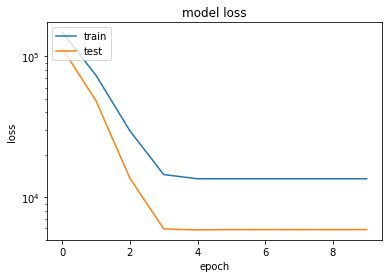

In [ ]:
draw(history)

### 2) SimpleRnn

In [ ]:
model_2 = models.Sequential() 
model_2.add(layers.SimpleRNN(8, input_shape=(PART_LEN, 1)))
model_2.add(layers.Dense(1))
model_2.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history = train_model(model_2, epochs=EPOCHS)

Epoch 1/10
11648/11648 [==============================] - 126s 11ms/step - loss: 159980.8125 - val_loss: 132621.3594
Epoch 2/10
11648/11648 [==============================] - 64s 5ms/step - loss: 92564.1875 - val_loss: 70515.2266
Epoch 3/10
11648/11648 [==============================] - 64s 6ms/step - loss: 46443.8516 - val_loss: 29634.7930
Epoch 4/10
11648/11648 [==============================] - 67s 6ms/step - loss: 21072.7676 - val_loss: 9384.4854
Epoch 5/10
11648/11648 [==============================] - 67s 6ms/step - loss: 13782.9004 - val_loss: 5907.0679
Epoch 6/10
11648/11648 [==============================] - 68s 6ms/step - loss: 13514.8086 - val_loss: 5866.9766
Epoch 7/10
11648/11648 [==============================] - 68s 6ms/step - loss: 13514.8545 - val_loss: 5880.6714
Epoch 8/10
11648/11648 [==============================] - 66s 6ms/step - loss: 13514.8389 - val_loss: 5888.3550
Epoch 9/10
11648/11648 [==============================] - 64s 6ms/step - loss: 13514.7500 - val_l

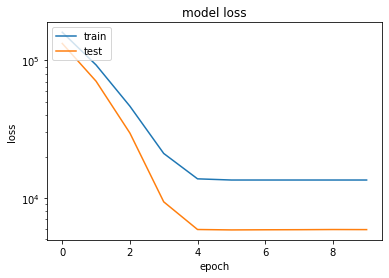

In [ ]:
draw(history)

### 4) Cnn 2 conv layers

In [ ]:
model_4 = models.Sequential()
model_4.add(layers.Conv1D(32, 3, activation='relu', input_shape=(PART_LEN, 1)))
model_4.add(layers.Conv1D(32, 3, activation='relu', input_shape=(PART_LEN, 1)))
model_4.add(layers.Dense(1))
model_4.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history = train_model(model_4, epochs=EPOCHS)

Epoch 1/10
11648/11648 [==============================] - 29s 2ms/step - loss: 216.6017 - val_loss: 7.0186
Epoch 2/10
11648/11648 [==============================] - 29s 3ms/step - loss: 14.5997 - val_loss: 6.7960
Epoch 3/10
11648/11648 [==============================] - 29s 3ms/step - loss: 14.3436 - val_loss: 6.7305
Epoch 4/10
11648/11648 [==============================] - 29s 3ms/step - loss: 14.2088 - val_loss: 6.2318
Epoch 5/10
11648/11648 [==============================] - 29s 3ms/step - loss: 13.9652 - val_loss: 8.7136
Epoch 6/10
11648/11648 [==============================] - 29s 3ms/step - loss: 13.7844 - val_loss: 5.7066
Epoch 7/10
11648/11648 [==============================] - 29s 3ms/step - loss: 13.7249 - val_loss: 9.6716
Epoch 8/10
11648/11648 [==============================] - 29s 3ms/step - loss: 13.6927 - val_loss: 5.4174
Epoch 9/10
11648/11648 [==============================] - 29s 3ms/step - loss: 13.6170 - val_loss: 6.5145
Epoch 10/10
11648/11648 [====================

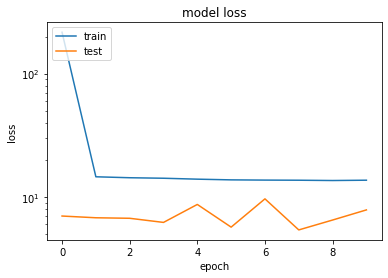

In [ ]:
draw(history)

### 5) 1 LSTM 50 units + Dense layer

In [ ]:
model_5 = models.Sequential()
model_5.add(layers.LSTM(50, input_shape=(PART_LEN, 1))) 
model_5.add(layers.Dense(10))
model_5.add(layers.Dense(1))
model_5.compile(loss='mean_squared_error', optimizer='adam') 

In [ ]:
history = train_model(model_5, epochs=5)

Epoch 1/10
11648/11648 [==============================] - 217s 18ms/step - loss: 8374.1016 - val_loss: 6.0677
Epoch 2/10
11648/11648 [==============================] - 213s 18ms/step - loss: 4.4235 - val_loss: 8.3233
Epoch 3/10
11648/11648 [==============================] - 212s 18ms/step - loss: 2.5739 - val_loss: 1.5796
Epoch 4/10
11648/11648 [==============================] - 226s 19ms/step - loss: 1.7649 - val_loss: 0.7942
Epoch 5/10
11648/11648 [==============================] - 212s 18ms/step - loss: 1.5044 - val_loss: 0.4403
Epoch 6/10
11648/11648 [==============================] - 216s 19ms/step - loss: 1.4413 - val_loss: 0.3949
Epoch 7/10
11648/11648 [==============================] - 222s 19ms/step - loss: 1.3590 - val_loss: 0.2694
Epoch 8/10
11648/11648 [==============================] - 224s 19ms/step - loss: 1.3468 - val_loss: 0.3124
Epoch 9/10
11648/11648 [==============================] - 224s 19ms/step - loss: 1.4501 - val_loss: 0.2509
Epoch 10/10
11648/11648 [=========

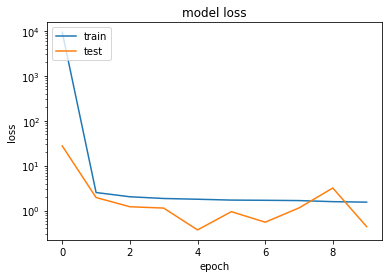

In [ ]:
draw(history)

more neurons

In [ ]:
model_8 = models.Sequential()
model_8.add(layers.LSTM(100, input_shape=(PART_LEN, 1))) 
model_8.add(layers.Dense(50))
model_8.add(layers.Dense(1))
model_8.compile(loss='mean_squared_error', optimizer='adam') 

In [ ]:
history = train_model(model_8, epochs=10)

Epoch 1/10
11648/11648 [==============================] - 188s 16ms/step - loss: 2390.7815 - val_loss: 0.4768
Epoch 2/10
11648/11648 [==============================] - 184s 16ms/step - loss: 2.1430 - val_loss: 0.6551
Epoch 3/10
11648/11648 [==============================] - 184s 16ms/step - loss: 1.8474 - val_loss: 0.2976
Epoch 4/10
11648/11648 [==============================] - 184s 16ms/step - loss: 1.6538 - val_loss: 0.6810
Epoch 5/10
11648/11648 [==============================] - 188s 16ms/step - loss: 1.6015 - val_loss: 0.2786
Epoch 6/10
11648/11648 [==============================] - 186s 16ms/step - loss: 1.5137 - val_loss: 0.6315
Epoch 7/10
11648/11648 [==============================] - 187s 16ms/step - loss: 1.6577 - val_loss: 0.3788
Epoch 8/10
11648/11648 [==============================] - 188s 16ms/step - loss: 1.5331 - val_loss: 0.7974
Epoch 9/10
11648/11648 [==============================] - 187s 16ms/step - loss: 1.5695 - val_loss: 0.7193
Epoch 10/10
11648/11648 [=========

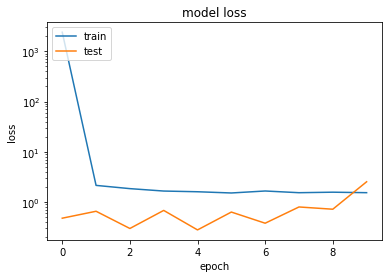

In [ ]:
draw(history)

more layers and longer tail

In [ ]:
PART_LEN=100
model_9 = models.Sequential()
model_9.add(layers.LSTM(100, return_sequences=True, input_shape=(PART_LEN, 1))) 
model_9.add(layers.Dense(50))
model_9.add(layers.Dense(10))
model_9.add(layers.Dense(1))
model_9.compile(loss='mean_squared_error', optimizer='adam') 

In [ ]:
history = train_model(model_9, epochs=10)

Epoch 1/10
11647/11647 [==============================] - 350s 30ms/step - loss: 1478.7656 - val_loss: 16.4448
Epoch 2/10
11647/11647 [==============================] - 348s 30ms/step - loss: 33.7521 - val_loss: 23.7699
Epoch 3/10
11647/11647 [==============================] - 348s 30ms/step - loss: 31.5436 - val_loss: 12.2656
Epoch 4/10
11647/11647 [==============================] - 347s 30ms/step - loss: 30.9845 - val_loss: 12.3594
Epoch 5/10
11647/11647 [==============================] - 346s 30ms/step - loss: 30.1492 - val_loss: 11.7939
Epoch 6/10
11647/11647 [==============================] - 347s 30ms/step - loss: 29.9285 - val_loss: 19.6730
Epoch 7/10
11647/11647 [==============================] - 346s 30ms/step - loss: 29.5948 - val_loss: 11.8034
Epoch 8/10
11647/11647 [==============================] - 346s 30ms/step - loss: 29.3358 - val_loss: 13.6622
Epoch 9/10
11647/11647 [==============================] - 347s 30ms/step - loss: 29.1960 - val_loss: 11.7024
Epoch 10/10
11647

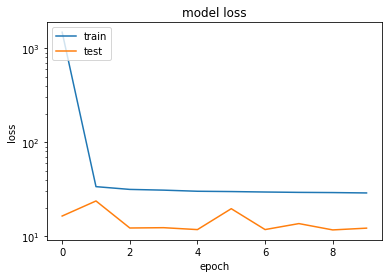

In [ ]:
draw(history)

add dropout

In [ ]:
PART_LEN=100
model_10 = models.Sequential()
model_10.add(layers.LSTM(100, return_sequences=True, input_shape=(PART_LEN, 1))) 
model_10.add(layers.Dense(50))
model_10.add(layers.Dropout(.1))
model_10.add(layers.Dense(10))
model_10.add(layers.Dropout(.1))
model_10.add(layers.Dense(1))
model_10.compile(loss='mean_squared_error', optimizer='adam') 

In [15]:
history = train_model(model_10, epochs=10)

Epoch 1/10
11647/11647 [==============================] - 354s 30ms/step - loss: 4151.5098 - val_loss: 31.4341
Epoch 2/10
11647/11647 [==============================] - 356s 31ms/step - loss: 2525.7173 - val_loss: 45.9953
Epoch 3/10
11647/11647 [==============================] - 351s 30ms/step - loss: 2354.8752 - val_loss: 84.8726
Epoch 4/10
11647/11647 [==============================] - 356s 31ms/step - loss: 2157.4697 - val_loss: 23.4212
Epoch 5/10
11647/11647 [==============================] - 351s 30ms/step - loss: 1964.2719 - val_loss: 27.1818
Epoch 6/10
11647/11647 [==============================] - 357s 31ms/step - loss: 1829.6696 - val_loss: 20.6077
Epoch 7/10
11647/11647 [==============================] - 353s 30ms/step - loss: 1738.7245 - val_loss: 83.5843
Epoch 8/10
11647/11647 [==============================] - 356s 31ms/step - loss: 1658.6910 - val_loss: 42.8535
Epoch 9/10
11647/11647 [==============================] - 349s 30ms/step - loss: 1580.7135 - val_loss: 23.4770
E

### 6) Only Dense layers

In [ ]:
model_6 = models.Sequential()
model_6.add(layers.Dense(10, activation="relu"))
model_6.add(layers.Dense(20, activation="relu"))
model_6.add(layers.Dense(10, activation="relu"))
model_6.add(layers.Dense(20, activation="relu"))
model_6.add(layers.Dense(1))
model_6.compile(loss='mean_squared_error', optimizer='adam') 

In [ ]:
history = train_model(model_6, epochs=EPOCHS)

Epoch 1/10
11648/11648 [==============================] - 16s 1ms/step - loss: 38.9379 - val_loss: 2.6133
Epoch 2/10
11648/11648 [==============================] - 17s 1ms/step - loss: 4.4997 - val_loss: 1.0410
Epoch 3/10
11648/11648 [==============================] - 17s 1ms/step - loss: 3.3320 - val_loss: 1.5289
Epoch 4/10
11648/11648 [==============================] - 18s 2ms/step - loss: 3.0074 - val_loss: 1.7553
Epoch 5/10
11648/11648 [==============================] - 19s 2ms/step - loss: 2.8156 - val_loss: 2.5335
Epoch 6/10
11648/11648 [==============================] - 18s 2ms/step - loss: 2.6312 - val_loss: 1.3387
Epoch 7/10
11648/11648 [==============================] - 18s 2ms/step - loss: 2.4570 - val_loss: 0.6769
Epoch 8/10
11648/11648 [==============================] - 18s 2ms/step - loss: 2.3623 - val_loss: 1.3912
Epoch 9/10
11648/11648 [==============================] - 17s 1ms/step - loss: 2.2590 - val_loss: 2.0022
Epoch 10/10
11648/11648 [=============================

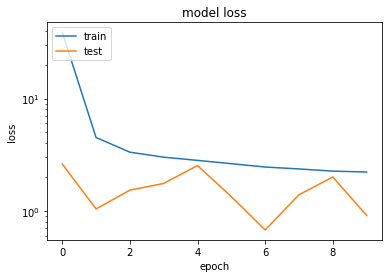

In [ ]:
draw(history)

### 7) Linear model

In [ ]:
model_7 = models.Sequential()
model_7.add(layers.Dense(1))
model_7.compile(loss='mean_squared_error', optimizer='adam') 

In [ ]:
history = train_model(model_7, epochs=EPOCHS)

Epoch 1/10
11648/11648 [==============================] - 14s 1ms/step - loss: 163.6862 - val_loss: 16.1669
Epoch 2/10
11648/11648 [==============================] - 13s 1ms/step - loss: 6.0864 - val_loss: 5.3724
Epoch 3/10
11648/11648 [==============================] - 15s 1ms/step - loss: 4.3993 - val_loss: 1.3873
Epoch 4/10
11648/11648 [==============================] - 14s 1ms/step - loss: 3.4666 - val_loss: 6.9841
Epoch 5/10
11648/11648 [==============================] - 14s 1ms/step - loss: 2.9839 - val_loss: 1.0890
Epoch 6/10
11648/11648 [==============================] - 13s 1ms/step - loss: 2.7628 - val_loss: 5.7624
Epoch 7/10
11648/11648 [==============================] - 11s 952us/step - loss: 2.5549 - val_loss: 1.2622
Epoch 8/10
11648/11648 [==============================] - 11s 965us/step - loss: 2.4287 - val_loss: 0.5477
Epoch 9/10
11648/11648 [==============================] - 11s 967us/step - loss: 2.3497 - val_loss: 2.2491
Epoch 10/10
11648/11648 [=====================

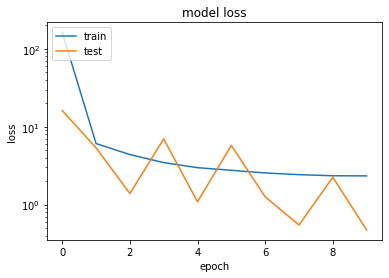

In [ ]:
draw(history)

тестовый классификатор

In [ ]:
clf_data = init_data[-2000:].copy()

In [ ]:
def get_decision(i, model):
    if i < PART_LEN:
        return None

    y = model.predict(clf_data[i-PART_LEN:i].reshape(1, -1))[0][0]
    if y > clf_data[i - 1]:
        return True # buy
    elif y < clf_data[i - 1]:
        return False # sell
    else:
        return None

In [ ]:
def test_on_clf_data(model):
    money = 0
    amount = 0

    for i in range(len(clf_data)):
        decision = get_decision(i, model)
        if decision == True:
            money -= clf_data[i]
            amount += 1
        elif decision == False and amount:
            money += amount * clf_data[i]
            amount = 0
            
    print(f"Revenue = ", amount * clf_data[-1] + money)

In [ ]:
test_on_clf_data(model_5)

Revenue =  4.0999999999979195


In [ ]:
test_on_clf_data(model_6)

Revenue =  70.89999999999844


In [ ]:
test_on_clf_data(model_7)

Revenue =  33.00000000000068


сохраним какую-нибудь модель для использования в классификаторе и боте

In [ ]:
model_6.save('result_model')

2022-03-08 20:38:19.026577: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: result_model/assets
